C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


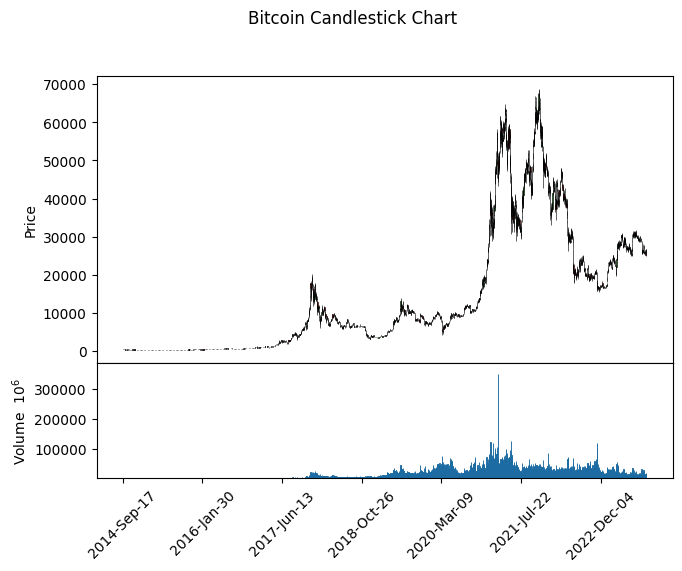

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


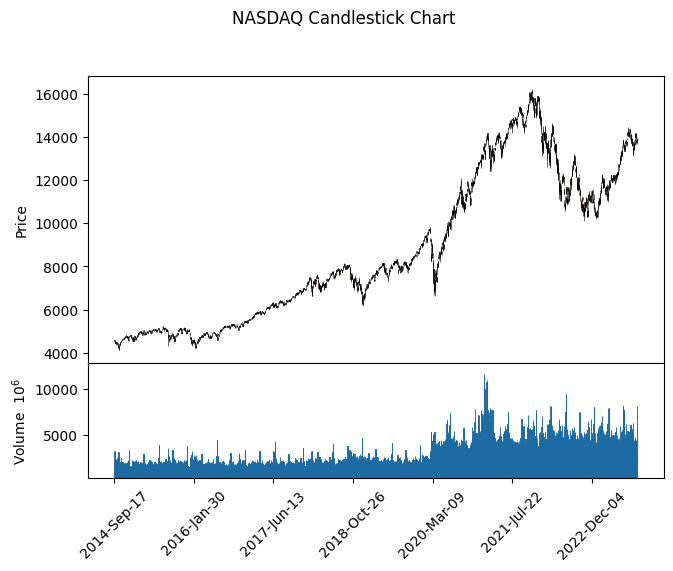

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


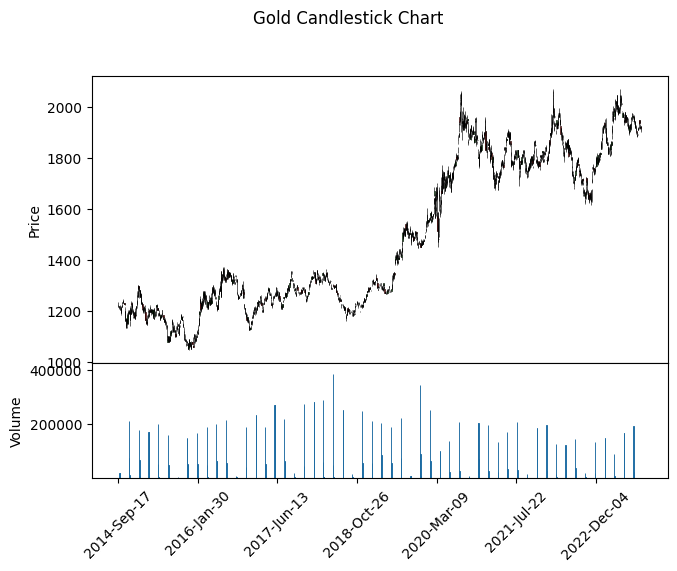

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Group 3 Dataset.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Clean column names to remove any extra spaces
df.columns = df.columns.str.strip()

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Function to plot candlestick chart
def plot_candlestick(data, title):
    mc = mpf.make_marketcolors(up='g', down='r', edge='black', wick='black')
    s = mpf.make_mpf_style(marketcolors=mc)
    mpf.plot(data, type='candle', style=s, title=title, ylabel='Price', volume=True)

#BTC data
btc_columns = ['BTC Open', 'BTC High', 'BTC Low', 'BTC Close', 'BTC Volume']
btc_columns = [col for col in btc_columns if col in df.columns]
btc_data = df[btc_columns]
btc_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume'][:len(btc_columns)]
plot_candlestick(btc_data, 'Bitcoin Candlestick Chart')

#NASDAQ data
nasdaq_columns = ['NASDAQ Open', 'NASDAQ High', 'NASDAQ Low', 'NASDAQ Close', 'NASDAQ Volume']
nasdaq_columns = [col for col in nasdaq_columns if col in df.columns]
nasdaq_data = df[nasdaq_columns]
nasdaq_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume'][:len(nasdaq_columns)]
plot_candlestick(nasdaq_data, 'NASDAQ Candlestick Chart')

#Gold data
gold_columns = ['Gold Open', 'Gold High', 'Gold Low', 'Gold Close', 'Gold Volume']
gold_columns = [col for col in gold_columns if col in df.columns]
gold_data = df[gold_columns]
gold_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume'][:len(gold_columns)]
plot_candlestick(gold_data, 'Gold Candlestick Chart')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Squared Error for Each Parameter Combination:
                                               params  mean_test_score
0   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.045311
1   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.036713
2   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.033545
3   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.045153
4   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.037817
5   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.034711
6   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.045086
7   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.037986
8   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.034809
9   {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.031221
10  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.031311
11  {'learning_rate': 0.1, 'max_depth': 3

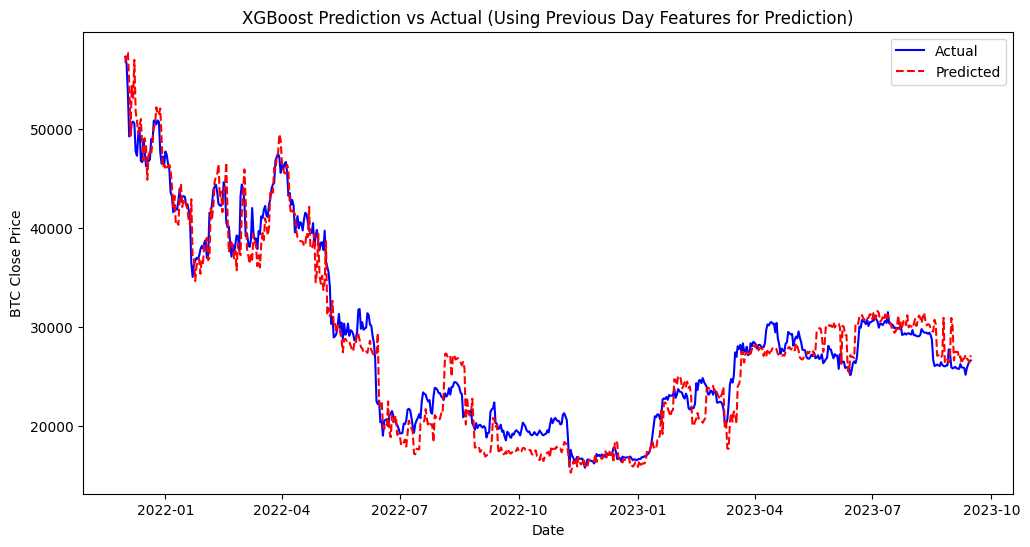

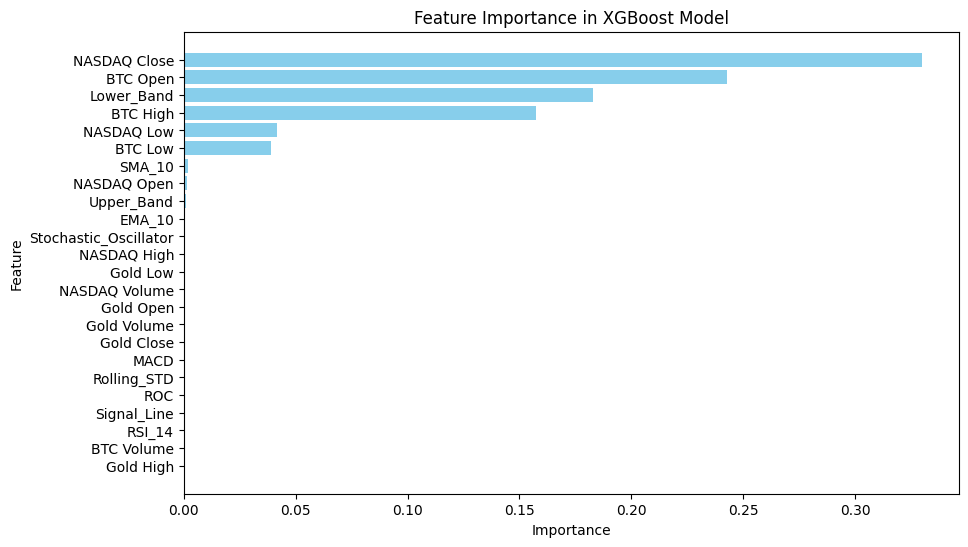

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

# Function to add technical indicators
def add_technical_indicators(df):
    df['SMA_10'] = df['BTC Close'].rolling(window=10).mean()
    df['EMA_10'] = df['BTC Close'].ewm(span=10, adjust=False).mean()
    df['RSI_14'] = 100 - (100 / (1 + df['BTC Close'].diff().apply(lambda x: (x if x > 0 else 0)).rolling(14).mean() / df['BTC Close'].diff().apply(lambda x: (-x if x < 0 else 0)).rolling(14).mean()))
    df['ROC'] = df['BTC Close'].pct_change(periods=10) * 100
    df['Rolling_STD'] = df['BTC Close'].rolling(window=10).std()
    df['Upper_Band'] = df['SMA_10'] + (df['Rolling_STD'] * 2)
    df['Lower_Band'] = df['SMA_10'] - (df['Rolling_STD'] * 2)
    df['MACD'] = df['BTC Close'].ewm(span=12, adjust=False).mean() - df['BTC Close'].ewm(span=26, adjust=False).mean()
    df['Stochastic_Oscillator'] = ((df['BTC Close'] - df['BTC Close'].rolling(14).min()) / (df['BTC Close'].rolling(14).max() - df['BTC Close'].rolling(14).min())) * 100
    df['Signal_Line'] = df['Stochastic_Oscillator'].rolling(3).mean()
    return df

df = add_technical_indicators(df)

# Selecting target and feature columns
target_col = 'BTC Close'
feature_cols = ['BTC Open', 'BTC High', 'BTC Low', 'BTC Volume', 'NASDAQ Open', 'NASDAQ Close', 'NASDAQ High', 'NASDAQ Low', 'NASDAQ Volume', 'Gold Open', 'Gold Close', 'Gold High', 'Gold Low', 'Gold Volume', 'SMA_10', 'EMA_10', 'RSI_14', 'ROC', 'Rolling_STD', 'Upper_Band', 'Lower_Band', 'MACD', 'Stochastic_Oscillator', 'Signal_Line']

# Ensure only existing columns are used
feature_cols = [col for col in feature_cols if col in df.columns]

data = df[feature_cols]
target = df[target_col]

# Shifting features one day back to predict the next day's BTC Close
features_shifted = data.shift(1).dropna()
target_shifted = target.loc[features_shifted.index]

# Splitting into training and testing data
split_ratio = 0.8
split_index = int(len(features_shifted) * split_ratio)

X_train, X_test = features_shifted.iloc[:split_index], features_shifted.iloc[split_index:]
y_train, y_test = target_shifted.iloc[:split_index], target_shifted.iloc[split_index:]

# Normalizing the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

# Display squared error for each parameter combination
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score']]
cv_results['mean_test_score'] = -cv_results['mean_test_score']  # Convert to positive MSE
print("Squared Error for Each Parameter Combination:")
print(cv_results)

# Best model
best_model = grid_search.best_estimator_

# Feature importance
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Predicting the test set
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.title('XGBoost Prediction vs Actual (Using Previous Day Features for Prediction)')
plt.legend()
plt.show()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()
plt.show()


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Squared Error for Each Parameter Combination:
                                             params  mean_test_score
0   {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}         0.000337
1      {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}         0.047537
2     {'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}         0.768764
3    {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}         0.022365
4       {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}         0.049673
5      {'C': 0.1, 'epsilon': 0.1, 'kernel': 'poly'}         0.007224
6    {'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}         0.063389
7       {'C': 0.1, 'epsilon': 0.2, 'kernel': 'rbf'}         0.062083
8      {'C': 0.1, 'epsilon': 0.2, 'kernel': 'poly'}         0.062906
9     {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}         0.000235
10       {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}         0.043863
11      {'C': 1, 'epsilon': 0.01, 'kernel': 'poly'}         0.355

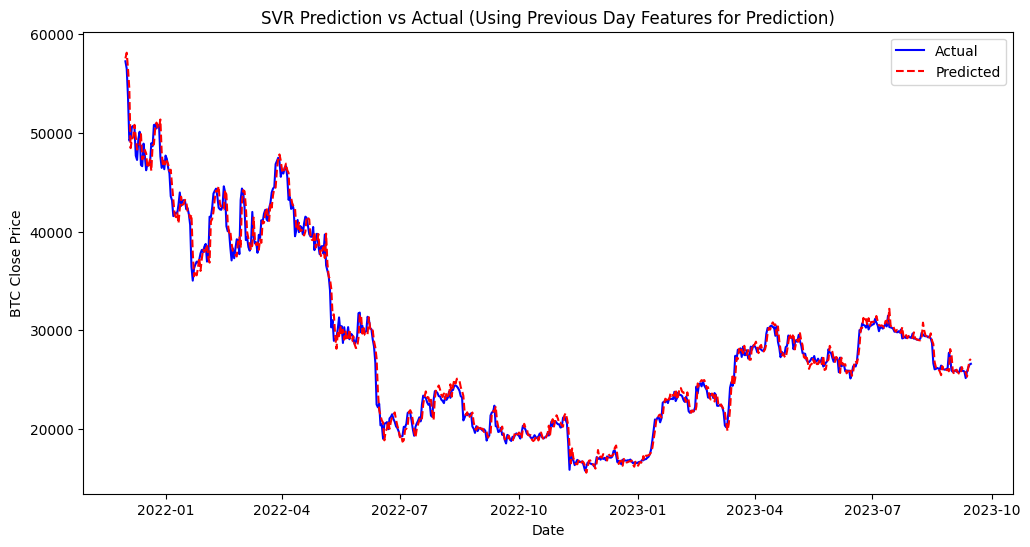

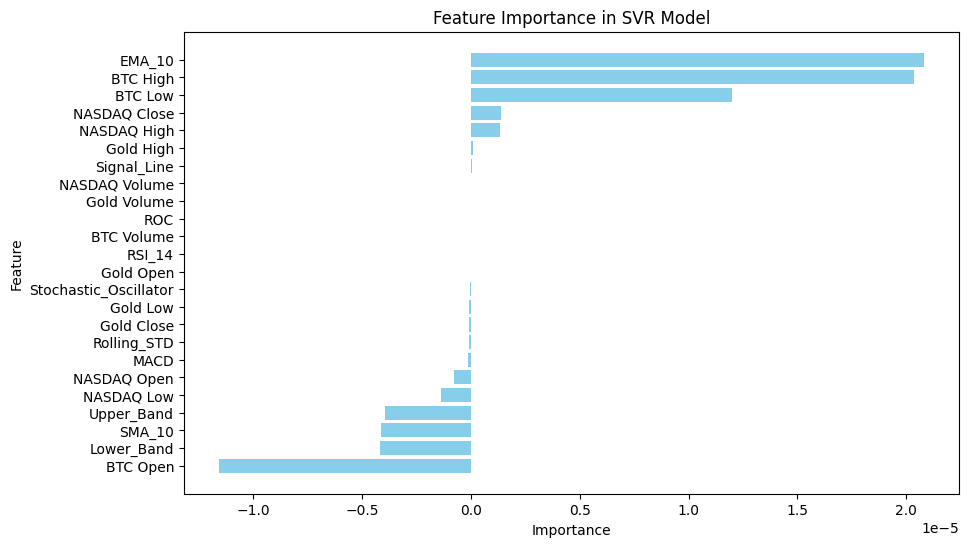

In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = add_technical_indicators(df)

# Selecting target and feature columns
target_col = 'BTC Close'
feature_cols = ['BTC Open', 'BTC High', 'BTC Low', 'BTC Volume', 'NASDAQ Open', 'NASDAQ Close', 'NASDAQ High', 'NASDAQ Low', 'NASDAQ Volume',
                'Gold Open', 'Gold Close', 'Gold High', 'Gold Low', 'Gold Volume',
                'SMA_10', 'EMA_10', 'RSI_14', 'ROC', 'Rolling_STD', 'Upper_Band', 'Lower_Band', 'MACD', 'Stochastic_Oscillator', 'Signal_Line']

# Ensure only existing columns are used
feature_cols = [col for col in feature_cols if col in df.columns]

data = df[feature_cols]
target = df[target_col]

# Shift features by one day (yesterday's values for today's prediction)
X_shifted = data.shift(1).dropna()
y_shifted = target.loc[X_shifted.index]  # Keep target aligned

# Splitting into training and testing data
split_ratio = 0.8
split_index = int(len(X_shifted) * split_ratio)

X_train, X_test = X_shifted.iloc[:split_index], X_shifted.iloc[split_index:]
y_train, y_test = y_shifted.iloc[:split_index], y_shifted.iloc[split_index:]

# Normalizing the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

svr_model = SVR()
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

# Display squared error for each parameter combination
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score']]
cv_results['mean_test_score'] = -cv_results['mean_test_score']  # Convert to positive MSE
print("Squared Error for Each Parameter Combination:")
print(cv_results)

# Best model
best_model = grid_search.best_estimator_

# Feature importance using permutation importance
importance_results = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_results.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Predicting the test set
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.title('SVR Prediction vs Actual (Using Previous Day Features for Prediction)')
plt.legend()
plt.show()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in SVR Model')
plt.gca().invert_yaxis()
plt.show()
